# Introduction to Neural Network (1)
### Week1

[1] 추상목, 신경망 학습이론과 PyTorch\
[2] 김성필, 딥러닝 첫걸음

# 1. Creating a Neural Network
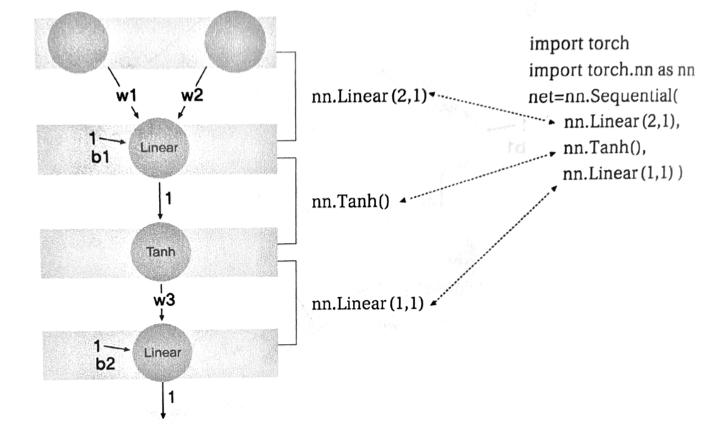

In [1]:
# Basic Example
import torch
import torch.nn as nn
net = nn.Sequential(
    nn.Linear(2,1),
    nn.Tanh(),
    nn.Linear(1,1))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
)


# 2. How to access parameters

In [2]:
# How to check parameters
import torch
import torch.nn as nn
torch.manual_seed(1)
net = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1))
params=list(net.parameters())
print(params)

[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True), Parameter containing:
tensor([[0.4694]], requires_grad=True), Parameter containing:
tensor([-0.9414], requires_grad=True)]


### The above result corresponds to the following:
[ Parameter containing: tensor([[ 0.3643, -0.3121]], requires_grad=True),　　# 0th component [[w1,w2]]; weights\
  Parameter containing: tensor([-0.1371], requires_grad=True),　　　　　　　　# 1st component [b1]; bias\
  Parameter containing: tensor([[0.4694]], requires_grad=True),　　　　　　　# 2nd component [w3]; weight\
  Parameter containing:tensor([-0.9414], requires_grad=True) ]　　　　　　　　# 3rd component [[b2]]; bias

##### * Note1: "tensor()" is a data type in PyTorch used to store data. Tensors are designed to be processed on a CPU or to utilize the parallel computing capabilities of a GPU.
##### * Note2: "requires_grad=True" is a function that updates the initial parameter values to ensure that the neural network output matches the desired value requires the gradient of the function with respect to the parameters.

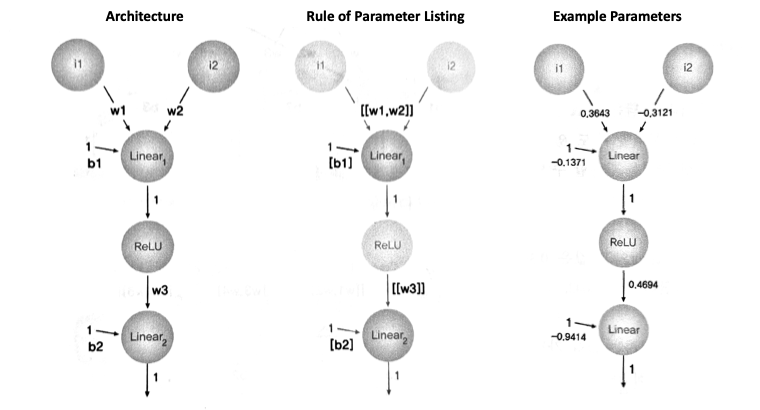

In [3]:
# How to access to each parameter
import torch
import torch.nn as nn
torch.manual_seed(1)
net = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1))
params=list(net.parameters())

print("[[w1,w2]]= params[0].data      =",params[0].data)
print("[w1,w2]  = params[0].data[0]   =",params[0].data[0])
print("w1       = params[0].data[0][0]=",params[0].data[0][0])
print("w1       = params[0].data[0][1]=",params[0].data[0][1])
print("")
print("[b1]     = params[1].data      =",params[1].data)
print("b1       = params[1].data[0]   =",params[1].data[0])
print("")
print("[[w3]]   = params[2].data      =",params[2].data)
print("[w3]     = params[2].data[0]   =",params[2].data[0])
print("w3       = params[2].data[0][0]=",params[2].data[0][0])
print("")
print("[b2]     = params[3].data      =",params[3].data)
print("b2       = params[3].data[0]   =",params[3].data[0])


[[w1,w2]]= params[0].data      = tensor([[ 0.3643, -0.3121]])
[w1,w2]  = params[0].data[0]   = tensor([ 0.3643, -0.3121])
w1       = params[0].data[0][0]= tensor(0.3643)
w1       = params[0].data[0][1]= tensor(-0.3121)

[b1]     = params[1].data      = tensor([-0.1371])
b1       = params[1].data[0]   = tensor(-0.1371)

[[w3]]   = params[2].data      = tensor([[0.4694]])
[w3]     = params[2].data[0]   = tensor([0.4694])
w3       = params[2].data[0][0]= tensor(0.4694)

[b2]     = params[3].data      = tensor([-0.9414])
b2       = params[3].data[0]   = tensor(-0.9414)


In [4]:
# How to check input and output (Single Dataset)
import torch
import torch.nn as nn
torch.manual_seed(1)

input = torch.tensor([[1.0, 2.0]],dtype= torch.float32)
target= torch.tensor([[0.1]],dtype= torch.float32)
net = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1))
output= net(input)
loss= (output-target)**2

print('input=',input)
print('input.dtype=',input.dtype); print()
print('target=',target)
print('target.dtype=',target.dtype); print()
print('output=',output.data) # output (x) / output.data (o)
print('output.dtype=',output.dtype); print()
print('loss=',loss.data)     # loss (x) / loss.data (o)

input= tensor([[1., 2.]])
input.dtype= torch.float32

target= tensor([[0.1000]])
target.dtype= torch.float32

output= tensor([[-0.9414]])
output.dtype= torch.float32

loss= tensor([[1.0846]])


In [5]:
# How to check input and output (Double Dataset)
import torch
import torch.nn as nn
torch.manual_seed(1)

input = torch.tensor([[1.0, 2.0],[3.0, 4.0]],dtype= torch.float32) # data list become changed
target= torch.tensor([[0.1],[0.2]],dtype= torch.float32)           # data list become changed
net = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1))
output= net(input)
loss= torch.sum((output-target)**2)  # summation is added

print('input=',input)
print('input.dtype=',input.dtype); print()
print('target=',target)
print('target.dtype=',target.dtype); print()
print('output=',output.data) # output (x) / output.data (o)
print('output.dtype=',output.dtype); print()
print('loss=',loss.data)     # loss (x) / loss.data (o)

input= tensor([[1., 2.],
        [3., 4.]])
input.dtype= torch.float32

target= tensor([[0.1000],
        [0.2000]])
target.dtype= torch.float32

output= tensor([[-0.9414],
        [-0.9414]])
output.dtype= torch.float32

loss= tensor(2.3875)


# 3. How to train the dataset
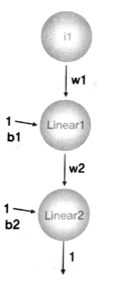

In [6]:
# Step0. Import PyTorch
import torch
import torch.nn as nn

# Step1. Set the seed for reproducibility
torch.manual_seed(1)

# Step2. Define training data and neural network structure
input = torch.tensor([[1.0]], dtype=torch.float32)
target = torch.tensor([[0.1]], dtype=torch.float32)
net = nn.Sequential(
    nn.Linear(1, 1), 
    nn.Linear(1, 1))

# Initial parameter values generated by executing line 10
params = list(net.parameters())
print('Initial values')
print('w1 =', params[0].data)
print('b1 =', params[1].data)
print('w2 =', params[2].data)
print('b2 =', params[3].data)
print()

# Step3. Stochastic Gradient Descent (SGD) optimizer for updating parameters
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Step4-1. Compute the loss of the neural network
loss = (net(input) - target) ** 2

# Step4-2. Compute the gradients of the loss with respect to the parameters
loss.backward()

# Step4-3. Update the parameters once using the computed gradients
optimizer.step()

# Updated parameter values after one optimization step
print('Updated values after one optimization step')
print('w1 =', params[0].data)
print('b1 =', params[1].data)
print('w2 =', params[2].data)
print('b2 =', params[3].data)

Initial values
w1 = tensor([[0.5153]])
b1 = tensor([-0.4414])
w2 = tensor([[-0.1939]])
b2 = tensor([0.4694])

Updated values after one optimization step
w1 = tensor([[0.5290]])
b1 = tensor([-0.4276])
w2 = tensor([[-0.1991]])
b2 = tensor([0.3984])


In [7]:
# Update initial parameters multiple times
# Note: The stored partial derivative values must be reset to zero. (optimizer.zero_grad())
import torch
import torch.nn as nn
torch.manual_seed(1)

input=torch.tensor([[1.0]],dtype=torch.float32)
target=torch.tensor([[0.1]],dtype=torch.float32)

net=nn.Sequential(
    nn.Linear(1,1),
    nn.Linear(1,1))

optimizer=torch.optim.SGD(net.parameters(),lr=0.1)

for iter in range(0,10):
    optimizer.zero_grad() # The stored partial derivative values must be reset to zero.
    loss = (net(input)-target)**2
    print("Initial parameter",iter,"th update: loss=",loss.data.item())
    loss.backward()
    optimizer.step()

Initial parameter 0 th update: loss= 0.12605731189250946
Initial parameter 1 th update: loss= 0.0773768499493599
Initial parameter 2 th update: loss= 0.04727375507354736
Initial parameter 3 th update: loss= 0.028741957619786263
Initial parameter 4 th update: loss= 0.017394304275512695
Initial parameter 5 th update: loss= 0.010483269579708576
Initial parameter 6 th update: loss= 0.006295486353337765
Initial parameter 7 th update: loss= 0.0037692212499678135
Initial parameter 8 th update: loss= 0.0022511007264256477
Initial parameter 9 th update: loss= 0.0013417239533737302


# 4. Save & Import

In [8]:
# SAVE
torch.save(net.state_dict(),"net_parameters.pt")

In [9]:
# IMPORT
net=nn.Sequential(nn.Linear(1,1),nn.Linear(1,1))
net.load_state_dict(torch.load("net_parameters.pt"))

/var/folders/13/0dt9n2155cb3fkq89rckxd840000gn/T/ipykernel_13106/2038876193.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load("net_parameter

<All keys matched successfully>

# 5. Example: AND Gate
Without PyTorch, single-layered neural network can solve this problem

Matplotlib is building the font cache; this may take a moment.
/var/folders/13/0dt9n2155cb3fkq89rckxd840000gn/T/ipykernel_13106/718597637.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Loss[epoch] = es / len(X)


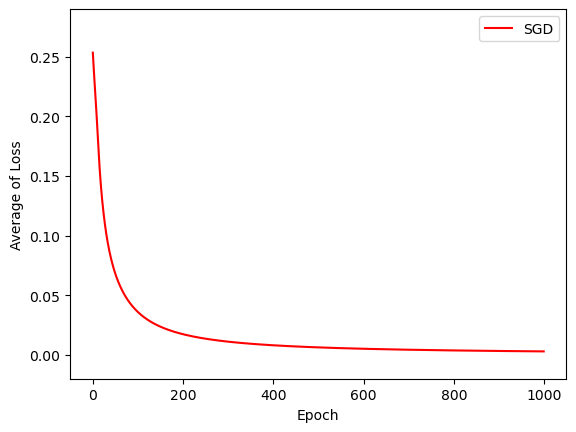

In [10]:
# AND gate 
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function definition
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# DeltaSGD function definition
def delta_sgd(W, X, D, learning_rate=0.9):
    for k in range(len(X)):
        x = X[k].reshape(-1, 1)
        d = D[k]
        v = np.dot(W, x)
        y = sigmoid(v)
        e = d - y
        delta = e * y * (1 - y)
        W += learning_rate * delta * x.T
    return W


# Define Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1]) # Answer

# Initial weight
W = 2 * np.random.rand(1, 3) - 1

# Number of epochs
epochs = 1000

# Initialize loss
Loss = np.zeros(epochs)

# Run training
for epoch in range(epochs):
    W = delta_sgd(W, X, D)
    
    es = 0
    for k in range(len(X)):
        x = X[k].reshape(-1, 1)
        d = D[k]
        
        v = np.dot(W, x)
        y = sigmoid(v)
        es += (d - y) ** 2
        
    Loss[epoch] = es / len(X)


# Visualization
plt.plot(Loss, 'r', label='SGD')
plt.xlabel('Epoch')
plt.ylabel('Average of Loss')
plt.legend()
plt.ylim(-0.02,0.29)
plt.show()